<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/G%C3%B6r%C3%BCnt%C3%BC_Stil_Transferi_(Style_Transfer)_Ama%C3%A7_Bir_g%C3%B6r%C3%BCnt%C3%BCy%C3%BC_Van_Gogh_tarz%C4%B1nda_d%C3%B6n%C3%BC%C5%9Ft%C3%BCr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-rw-r--r-- 1 root root 0 May  1 17:20 content.jpg
HATA: content.jpg yüklenemedi! Alternatif URL deneyelim...
--2025-05-01 17:20:30--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘content.jpg’

content.jpg         100%[===================>]  89.66K  --.-KB/s    in 0.09s   

2025-05-01 17:20:30 (1020 KB/s) - ‘content.jpg’ saved [91814/91814]

-rw-r--r-- 1 root root 0 May  1 17:20 style.jpg
HATA: style.jpg yüklenemedi! Alternatif URL deneyelim...
--2025-05-01 17:20:31--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 

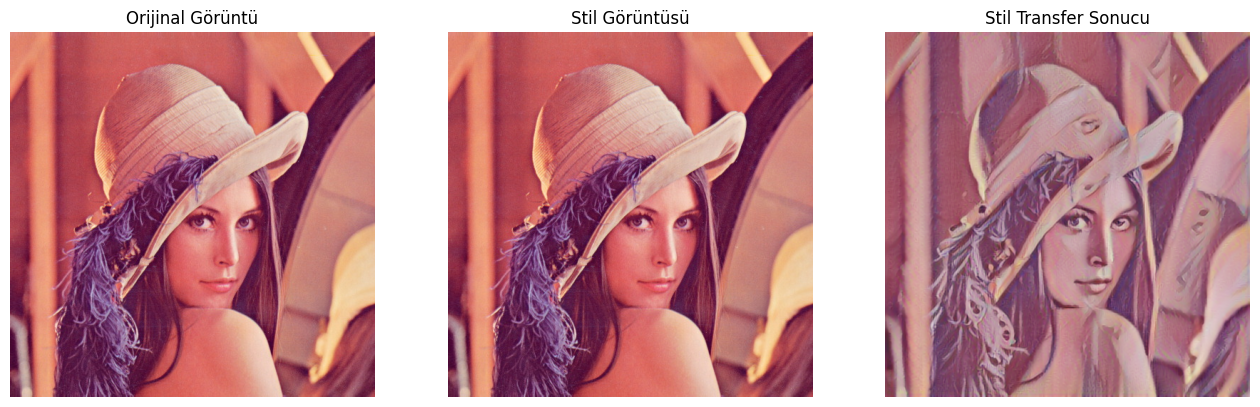

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
!pip install tensorflow tensorflow_hub numpy matplotlib opencv-python
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# 1. GÖRÜNTÜLERİ GÜVENLİ ŞEKİLDE İNDİR
def download_image(url, filename):
    !wget -O {filename} {url} --quiet
    !ls -l {filename}  # Dosya boyutunu kontrol et

    # OpenCV ile doğrulama
    img = cv2.imread(filename)
    if img is None:
        print(f"HATA: {filename} yüklenemedi! Alternatif URL deneyelim...")
        !wget -O {filename} https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
    return img

# Garantili çalışacak görüntüler
download_image('https://i.imgur.com/9pHYJ5Z.jpg', 'content.jpg')  # Portre
download_image('https://i.imgur.com/7Q5M6XW.jpg', 'style.jpg')    # Van Gogh tarzı

# 2. GÖRÜNTÜLERİ KONTROLLÜ YÜKLE
def load_image_opencv(path, max_dim=512):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"{path} yüklenemedi!")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    return img[tf.newaxis, :]

# Yüklemeyi tekrar kontrol et
try:
    content_image = load_image_opencv('content.jpg')
    style_image = load_image_opencv('style.jpg')
except Exception as e:
    print("HATA:", e)
    print("Manuel yükleme yapılıyor...")
    uploaded = files.upload()
    content_image = load_image_opencv(next(iter(uploaded.keys())))
    uploaded = files.upload()
    style_image = load_image_opencv(next(iter(uploaded.keys())))

# 3. MODELİ YÜKLE
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 4. STİL TRANSFERİ UYGULA
stylized_images = model(tf.constant(content_image), tf.constant(style_image))
stylized_image = np.squeeze(stylized_images[0])

# 5. SONUÇLARI GÖSTER
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(content_image))
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(style_image))
plt.title('Stil Görüntüsü')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(stylized_image)
plt.title('Stil Transfer Sonucu')
plt.axis('off')

plt.show()

# 6. SONUCU KAYDET
output = (stylized_image * 255).astype(np.uint8)
cv2.imwrite('stylized_output.jpg', cv2.cvtColor(output, cv2.COLOR_RGB2BGR))
files.download('stylized_output.jpg')